In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk')

%matplotlib inline


In [2]:
data = 'http://openmv.net/info/website-traffic'
df = pd.read_csv('website-traffic.csv')
df.head()

,DayOfWeek,MonthDay,Year,Visits
0,Monday,June 1,2009,27
1,Tuesday,June 2,2009,31
2,Wednesday,June 3,2009,38
3,Thursday,June 4,2009,38
4,Friday,June 5,2009,31


In [9]:
df.describe()

,Year,Visits
count,214.0,214.000000
mean,2009.0,22.233645
std,0.0,8.331826
min,2009.0,3.000000
25%,2009.0,16.250000
50%,2009.0,22.000000
75%,2009.0,27.750000
max,2009.0,48.000000


In [10]:
df.isnull().sum()

DayOfWeek        0
MonthDay         0
Year             0
Visits           0
date_of_visit    0
dtype: int64

In [4]:
df['date_of_visit'] = pd.to_datetime(df.MonthDay.str.cat( df.Year.astype(str), sep=' '))
df.head()

,DayOfWeek,MonthDay,Year,Visits,date_of_visit
0,Monday,June 1,2009,27,2009-06-01
1,Tuesday,June 2,2009,31,2009-06-02
2,Wednesday,June 3,2009,38,2009-06-03
3,Thursday,June 4,2009,38,2009-06-04
4,Friday,June 5,2009,31,2009-06-05


This creates a new attribute called the date_of_visit using a combination of Day,
Month, and Year values available in the base dataframe. Since the dataset is about web site visits per day,
the variable of interest is the visit count for the day with the time dimension, i.e. date_of_visit being the
implicit one. The output plot of visits per day is shown in Figure

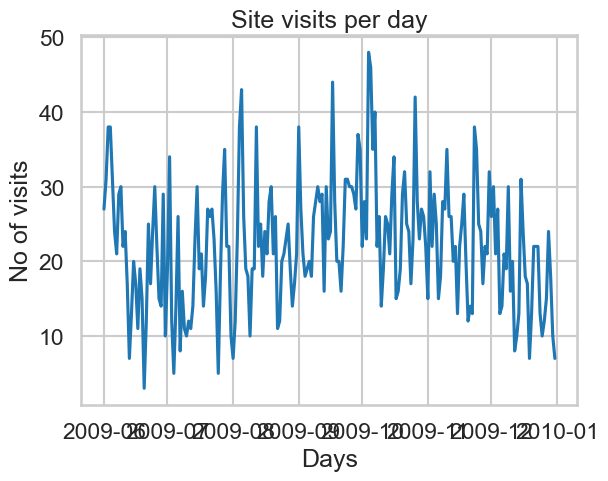

In [25]:
plt.plot(df["date_of_visit"],df['Visits'])
plt.xlabel('Days')
plt.ylabel('No of visits')
plt.title('Site visits per day')
plt.show()

In the following snippet, we utilize statsmodels to decompose our web site visit time series into Seasonality,trend, and residual constituents and then plot the same.

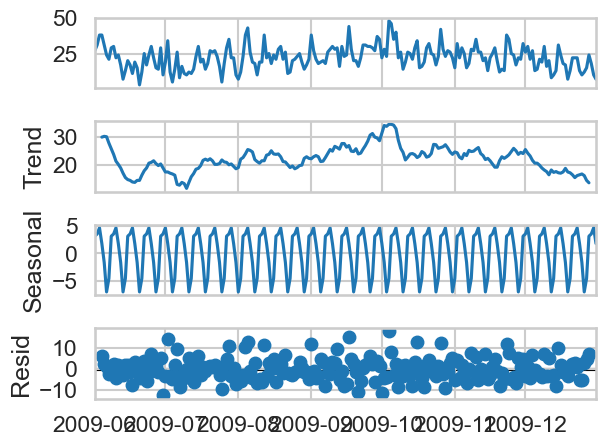

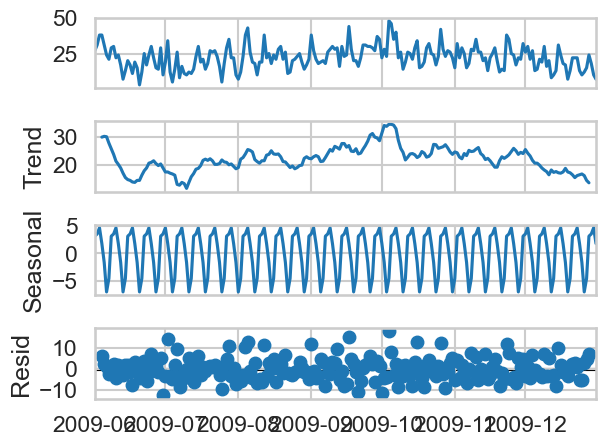

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

 # extract visits as series from the dataframe
ts_visits = pd.Series(df.Visits.values,index=pd.date_range(df.date_of_visit.min(),df.date_of_visit.max(),freq='D') )


decompose = seasonal_decompose(ts_visits.interpolate())
decompose.plot()

he following snippet calculates the moving
average for visits with a window size of 3

In [26]:
df['moving_average'] = df['Visits'].rolling(window=3, center=False).mean()
df[['Visits','moving_average']].head(10)



,Visits,moving_average
0,27,NaN
1,31,NaN
2,38,32.000000
3,38,35.666667
4,31,35.666667
5,24,31.000000
6,21,25.333333
7,29,24.666667
8,30,26.666667
9,22,27.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


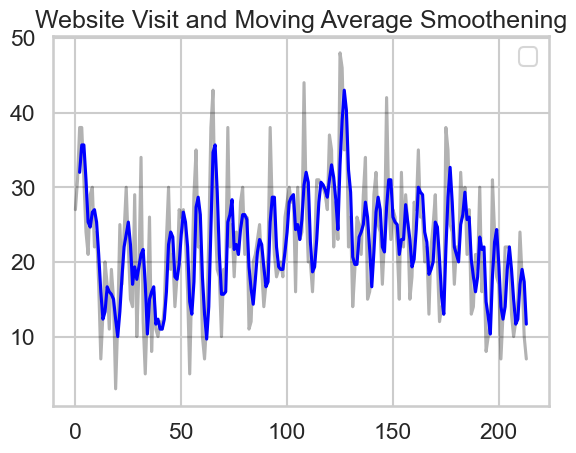

In [27]:
plt.plot(df.Visits,'-',color='black',alpha=0.3)
plt.plot(df.moving_average,color='b')
plt.title('Website Visit and Moving Average Smoothening')
plt.legend()
plt.show()

The following
snippet uses the pandas ewm() function to calculate the smoothened series for visits. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


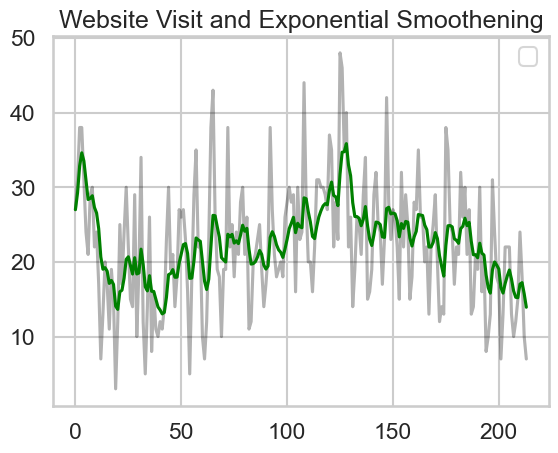

In [28]:
df['ewma'] = df['Visits'].ewm(halflife=3,
                                            ignore_na=False,
                                            min_periods=0,
                                            adjust=True).mean()

plt.plot(df.Visits,'-',color='black',alpha=0.3)
plt.plot(df.ewma,color='g')
plt.title('Website Visit and Exponential Smoothening')
plt.legend()
plt.show()